<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

Note:  This material largely follows the text "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997) and is meant as a guide and supplement to the material presented there.

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Linear Algebra

Numerical methods for linear algebra problems lies at the heart of many numerical approaches and is something we will spend some time on.  Roughly we can break down problems that we would like to solve into two general problems, solving a system of equations

$$A x = b$$

and solving the eigenvalue problem

$$A v = \lambda v.$$

We will take each in turn, evaluate some of the fundamental properties and methods for solving these problems, and gain some understanding of when they fail.

## General Problem Specification

Before we dive in lets consider some of the pivotal problems that numerical methods for linear algebra tries to address.  

For this discussion we will be using the common notation $m \times n$ to denote the dimensions of a matrix $A$.  The $m$ refers to the number of rows and $n$ the number of columns.  If a matrix is square, i.e. $m = n$, then we will use the notation that $A$ is $m \times m$.

### Systems of Equations

We have $m$ equations for $m$ unknowns.

$$A x = b$$

#### Example: Vandermonde Matrix

We have data $(x_i, y_i), ~~ i = 1, 2, \ldots, m$ that we want to fit a polynomial of order $m-1$.  Solving the linear system $A p = y$ does this for us where

$$A = \begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{m-1} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{m-1} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_m & x_m^2 & \cdots & x_m^{m-1}
\end{bmatrix} ~~~~~ y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}$$

and $p$ are the coefficients of the interpolating polynomial $\mathcal{P}_N(x) = p_0 + p_1 x + p_2 x^2 + \cdots + p_m x^{m-1}$.

#### Example: Linear least squares 1

In a similar case as above, say we want to fit a particular function (could be a polynomial) to a given number of data points except in this case we have more data points than free parameters.  In the case of polynomials this could be the same as saying we have $m$ data points but only want to fit a $n$th order polynomial through the data where $n \leq m - 1$.  One of the common approaches to this problem is to minimize the "least-squares" error between the data and the resulting function:
$$
    E = \left( \sum^m_{i=1} |y_i - f(x_i)|^2 \right )^{1/2}.
$$

But how do we do this if our matrix $A$ is now $m \times n$ and looks like
$$
    A = \begin{bmatrix}
        1 & x_1 & x_1^2 & \cdots & x_1^{n} \\
        1 & x_2 & x_2^2 & \cdots & x_2^{n} \\
        \vdots & \vdots & \vdots & & \vdots \\
        1 & x_m & x_m^2 & \cdots & x_m^{n}
    \end{bmatrix}?
$$

Turns out if we solve the system

$$A^T A x = A^T b$$

we can gaurantee that the error is minimized in the least-squares sense.

#### Example:  Linear least squares 2

Try and fit a line through the data points - code demo...

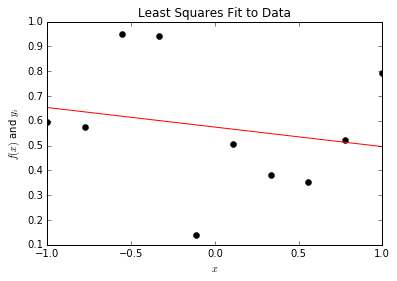

In [4]:
# Linear Least Squares Problem
N = 10
x = numpy.linspace(-1.0, 1.0, N)
y = numpy.random.random((N))

A = numpy.ones((x.shape[0], 2))
A[:, 1] = x
p = numpy.linalg.lstsq(A, y)[0]

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, y, 'ko')
axes.plot(x, p[0] + p[1] * x, 'r')
axes.set_title("Least Squares Fit to Data")
axes.set_xlabel("$x$")
axes.set_ylabel("$f(x)$ and $y_i$")

plt.show()

### Eigenproblems

Eigenproblems come up in a variety of contexts and often are integral to many problem of scientific and engineering interest.  As a review, if $A \in \mathbb{C}^{m\times m}$ (a square matrix with complex values), a non-zero vector $v\in\mathbb{C}^m$ is an **eigenvector** of $A$ with a corresponding **eigenvalue** $\lambda \in \mathbb{C}$ if 

$$A v = \lambda v.$$

One way to interpret the eigenproblem is that we are attempting to ascertain the "action" of the matrix $A$ on some subspace of $\mathbb{C}^m$ where this action acts like scalar multiplication.  This subspace is called an **eigenspace**.

#### Example

Compute the eigenspace of the matrix
$$
    A = \begin{bmatrix}
        1 & 2 \\
        2 & 1
    \end{bmatrix}
$$

Recall that we can find the eigenvalues of a matrix by computing $\det(A - \lambda I) = 0$.  

In this case we have
$$\begin{aligned}
    A - \lambda I &= \begin{bmatrix}
        1 & 2 \\
        2 & 1
    \end{bmatrix} - \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \lambda\\
    &= \begin{bmatrix}
        1 - \lambda & 2 \\
        2 & 1 - \lambda
    \end{bmatrix}
\end{aligned}$$
whose determinant is
$$\begin{aligned}
\begin{vmatrix}
    1 - \lambda & 2 \\
    2 & 1 - \lambda
\end{vmatrix} &= (1 - \lambda) (1 - \lambda) - 2 \cdot 2 \\
&= 1 - 2 \lambda + \lambda^2 - 4 \\
&= \lambda^2 - 2 \lambda - 3.
\end{aligned}$$

Setting this equal to zero we can find the eigenvalues as
$$\begin{aligned}
\lambda &= \frac{2 \pm \sqrt{4 - 4 \cdot 1 \cdot (-3)}}{2} \\
&= 1 \pm 2 \\
&= [-1, 3]
\end{aligned}$$

The eigenvectors then can be found by rearranging the equation to $(A - \lambda I) v = 0$ and solving for each vector.  A trick that works some of the time is to normalize each vector such that the first entry is 1 ($v_1 = 1$):
$$
    \begin{bmatrix}
        1 - \lambda & 2 \\
        2 & 1 - \lambda
    \end{bmatrix} \begin{bmatrix} 1 \\ v_2 \end{bmatrix} = 0
$$

$$\begin{aligned}
    1 - \lambda + 2 v_2 &= 0 \\
    v_2 &= \frac{\lambda - 1}{2}
\end{aligned}$$

We can check this by
$$\begin{aligned}
    2 + \left(1- \lambda \frac{\lambda - 1}{2}\right) & = 0\\
    (\lambda - 1)^2 - 4 &=0
\end{aligned}$$

which by design is satisfied by our eigenvalues.  Another sometimes easier approach is to plug-in the eigenvalues to find each corresponding eigenvector.  The eigenvectors are therefore

$$v = \begin{bmatrix}1 \\ -1 \end{bmatrix}, \begin{bmatrix}1 \\ 1 \end{bmatrix}.$$

Note that these are linearly independent.

## Fundamentals

### Matrix-Vector Multiplication

One of the most basic operations we can perform with matrices is to multiply them be a vector.  This matrix-vector product $A x = b$ is defined as
$$
    b_i = \sum^n_{j=1} a_{ij} x_j ~~~~~ \text{where}~~~~ i = 1, \ldots, m
$$

Writing the matrix-vector product this way we see that one interpretation of this product is that each column of $A$ is weighted by the value $x_j$, or in other words $b$ is a linear combination of the columns of $A$ where each column's weighting is $x$.
$$
    \begin{bmatrix} ~ \\ ~ \\ b \\ ~ \\ ~ \end{bmatrix} = 
    \begin{bmatrix} ~ & ~ & ~ & ~ \\ ~ & ~ & ~ & ~  \\ a_1 & a_2 & \cdots & a_n \\ ~ & ~ & ~ & ~  \\ ~ & ~ & ~ & ~ \end{bmatrix}
    \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} = x_1 \begin{bmatrix} ~ \\ ~ \\ a_1 \\ ~ \\ ~ \end{bmatrix} + x_2 \begin{bmatrix} ~ \\ ~ \\ a_2 \\ ~ \\ ~ \end{bmatrix} + \cdots + x_n \begin{bmatrix} ~ \\ ~ \\ a_n \\ ~ \\ ~ \end{bmatrix}
$$

This view will be useful later when we are trying to interpret various types of matrices.

One important property of the matrix-vector product is that is a **linear** operation, also known as a **linear operator**.  This means that the for any $x, y \in \mathbb{C}^n$ and any $c \in \mathbb{C}$ we know that

1. $A (x + y) = Ax + Ay$
1. $A\cdot (cx) = c A x$

#### Example:  Vandermonde Matrix

In the case where we have $m$ data points and want $m - 1$ order polynomial interpolant the matrix $A$ is a square $m \times m$ matrix as before.  Using the above interpretation the polynomial coefficients $p$ are the weights for each of the monomials that give exactly the $y$ values of the data.

#### Example:  Numerical matrix-vector multiply

Write a matrix-vector multiply function and check it with the appropriate `numpy` routine.  Also verify the linearity of the matrix-vector multiply.

In [3]:
#A x = b

#(m x n) (n x 1) = (m x 1)

def matrix_vector_product(A, x):
    m, n = A.shape
    b = numpy.zeros(m)
    for i in xrange(m):
        for j in xrange(n):
            b[i] += A[i, j] * x[j]
    return b

m = 4
n = 3
A = numpy.random.uniform(size=(m,n))
x = numpy.random.uniform(size=(n))
y = numpy.random.uniform(size=(n))
c = numpy.random.uniform()
b = matrix_vector_product(A, x)
print numpy.allclose(b, numpy.dot(A, x))
print numpy.allclose(matrix_vector_product(A, (x + y)), matrix_vector_product(A, x) + matrix_vector_product(A, y))
print numpy.allclose(matrix_vector_product(A, c * x), c*matrix_vector_product(A, x))

True
True
True


### Matrix-Matrix Multiplication

The matrix product with another matrix $A C = B$ is defined as
$$
    b_{ij} = \sum^m_{k=1} a_{ik} c_{kj}.
$$
Again, a useful interpretation of this operation is that the product result $B$ is the a linear combination of the columns of $A$.

What are the dimensions of $A$ and $C$ so that the multiplication works?

#### Example:  Outer Product

The product of two vectors $u \in \mathbb{C}^m$ and $v \in \mathbb{C}^n$ is a $m \times n$ matrix where the columns are the vector $u$ multiplied by the corresponding value of $v$:
$$
    \begin{bmatrix} ~ \\ ~ \\ u \\ ~ \\ ~ \end{bmatrix} \begin{bmatrix} v_1 & v_2 & \cdots \\ v_n \end{bmatrix} =
    \begin{bmatrix} ~ & ~ & ~ & ~ \\ ~ & ~ & ~ & ~ \\ v_1 u & v_2 u & \cdots & v_n u \\ ~ & ~ & ~ & ~ \\ ~ & ~ & ~ & ~  \end{bmatrix} = \begin{bmatrix} v_1u_1 & \cdots & v_n u_1 \\ \vdots & ~ & \vdots \\ v_1 u_m & \cdots & v_n u_m \end{bmatrix}
$$

#### Example:  Upper Triangular Multiplication

Consider the multiplication of a matrix $A \in \mathbb{C}^{m\times n}$ and the **upper-triangular** matrix $R$ defined as the $n \times n$ matrix with entries $r_{ij} = 1$ for $i \leq j$ and $r_{ij} = 0$ for $i > j$.  The product can be written as
$$
    \begin{bmatrix} ~ & ~ &  \\ ~ & ~ &  \\ b_1 & \cdots & b_n \\ ~ & ~ &  \\ ~ & ~ & ~ \end{bmatrix} = \begin{bmatrix} ~ & ~ &  \\ ~ & ~ &  \\ a_1 & \cdots & a_n \\ ~ & ~ &  \\ ~ & ~ & ~ \end{bmatrix} \begin{bmatrix} 1 & \cdots & 1 \\ ~ & \ddots & \vdots \\ ~ & ~ & 1 \end{bmatrix}.
$$

The columns of $B$ are then
$$
    b_j = A r_j = \sum^j_{k=1} a_k
$$
so that $b_j$ is the sum of the first $j$ columns of $A$.

#### Example: Write Matrix-Matrix Multiplication

Write a function that computes matrix-matrix multiplication and demonstrate the following properties:
1. $A (B + C) = AB + AC$ (for square matrices))
1. $A (cB) = c AB$ where $c \in \mathbb{C}$
1. $AB \neq BA$ in general

In [4]:
def matrix_matrix_product(A, B):
    C = numpy.zeros((A.shape[0], B.shape[1]))
    for i in xrange(A.shape[0]):
        for j in xrange(B.shape[1]):
            for k in xrange(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
    return C


m = 4
n = 4
p = 4
A = numpy.random.uniform(size=(m, n))
B = numpy.random.uniform(size=(n, p))
C = numpy.random.uniform(size=(m, p))
c = numpy.random.uniform()
print numpy.allclose(matrix_matrix_product(A, B), numpy.dot(A, B))
print numpy.allclose(matrix_matrix_product(A, (B + C)), matrix_matrix_product(A, B) + matrix_matrix_product(A, C))
print numpy.allclose(matrix_matrix_product(A, c * B), c*matrix_matrix_product(A, B))
print numpy.allclose(matrix_matrix_product(A, B), matrix_matrix_product(B, A))

True
True
True
False


#### NumPy Products

NumPy and SciPy contain routines that ware optimized to perform matrix-vector and matrix-matrix multiplication.  Given two `ndarray`s you can take their product by using the `dot` function.

In [5]:
n = 10
m = 5
A = numpy.identity(n)
x = numpy.random.random(n)
print numpy.allclose(x, numpy.dot(A, x))
A = numpy.random.random((m, n))
print numpy.dot(A, x)
B = numpy.random.random((n, m))
print numpy.dot(A, B)

True
[ 3.09805818  3.66916175  2.40284005  4.04266693  2.8966773 ]
[[ 2.55834418  2.99852619  2.57897492  1.80512424  2.18615731]
 [ 3.24329279  3.5683716   3.35386056  2.60451724  3.2647865 ]
 [ 2.01294494  2.4652074   1.91963552  1.73565015  2.23257946]
 [ 3.24777807  3.73967814  3.19871151  2.57001469  3.19403766]
 [ 2.56628028  2.79615838  2.20953113  1.71614199  2.69285006]]


### Range and Null-Space

The **range** of a matrix (similar to any function), denoted as $\text{range}(A)$, is the set of vectors that can be expressed as $A x$ for some $x$.  We can also then say that that $\text{range}(A)$ is the space **spanned** by the columns of $A$.  In other words the columns of $A$ provide a basis for $\text{range}(A)$, also called the **column space** of the matrix $A$.  Similarly the **null-space** of a matrix $A$, denoted $\text{null}(A)$ is the set of vectors $x$ that satisfy $A x = 0$.

A similar concept is the **rank** of the matrix $A$, denoted as $\text{rank}(A)$, is the dimension of the column space.  A matrix $A$ is said to have **full-rank** if $\text{rank}(A) = \min(m, n)$.  This property also implies that the matrix mapping is **one-to-one**.

### Inverse

A **non-singular** or **invertible** matrix is characterized as a matrix with full-rank.  This is related to why we know that the matrix is one-to-one, we can use it to transform a vector $x$ and using the inverse, denoted $A^{-1}$, we can map it back to the original matrix.  The familiar definition of this is
\begin{align*}
    A x &= b \\
    A^{-1} A x & = A^{-1} b \\
    x &=A^{-1} b
\end{align*}
where here $b$ is in the column space of $A$.

There are a number of important properties of a non-singular matrix A.  Here we list them as the following equivalent statements
1. $A$ has an inverse $A^{-1}$
1. $\text{rank}(A) = m$
1. $\text{range}(A) = \mathbb{C}^m$
1. $\text{null}(A) = {0}$
1. 0 is not an eigenvalue of $A$
1. $\text{det}(A) \neq 0$

#### Example:  Properties of invertible matrices

Show that given an invertible matrix that the rest of the properties hold.  Make sure to search the `numpy` packages for relevant functions.

In [6]:
m = 3
for n in xrange(100):
    A = numpy.random.uniform(size=(m, m))
    if numpy.linalg.det(A) != 0:
        break
        
print numpy.dot(numpy.linalg.inv(A), A)
print numpy.linalg.matrix_rank(A)
print "range"
print numpy.linalg.solve(A, numpy.zeros(m))
print numpy.linalg.eigvals(A)

[[  1.00000000e+00   1.20810844e-16   1.95291958e-16]
 [  1.18778707e-16   1.00000000e+00  -3.46240248e-17]
 [  2.05515867e-17   5.12916976e-17   1.00000000e+00]]
3
range
[ 0. -0.  0.]
[ 1.34442518  0.27168664 -0.16212841]


### Orthogonal Vectors and Matrices

Orthogonality is a very important concept in linear algebra that forms the basis of many of the modern methods used in numerical computations.  

Two vectors are said to be orthogonal if their **inner-product** or **dot-product** defined as
$$
    < x, y > \equiv (x, y) \equiv x \cdot y = \sum^m_{i=1} x_i y_i
$$
where here we have shown the various notations you may run into (the inner-product is in-fact a general term for a similar operation for mathematical objects such as functions).  

If $\langle x,y \rangle = 0$ then we say $x$ and $y$ are orthogonal.  The reason we use this terminology is that the inner-product of two vectors can also be written in terms of the angle between them where
$$
    \cos \theta = \frac{\langle x, y \rangle}{||x||~||y||}
$$
and $||x||$ is the Euclidean ($\ell^2$) norm of the vector $x$.  

We can write this in terms of the inner-product as well as
$$
    ||x||^2 = < x, x > = \sum^m_{i=1} |x_i|^2.
$$

The generalization of the inner-product to complex spaces is defined as
$$
    < x, y > = \sum^m_{i=1} x_i^* y_i
$$
where $x_i^*$ is the complex-conjugate of the value $x_i$.

Taking this idea one step further we can say a set of vectors $x \in X$ are orthogonal to $y \in Y$ if $\forall x,y$ $< x, y > = 0$.  If $\forall x,y$ $||x|| = 1$ and $||y|| = 1$ then they are also called orthonormal.

Another concept that is related to orthogonality is linear-independence.  A set of vectors $x \in X$ are **linearly independent** if $\forall x \in X$ that each $x$ cannot be written as a linear combination of the other vectors in the set $X$.  An equivalent statement is that there does not exist a set of scalars $c_i$ such that
$$
    x_k = \sum^n_{i=1, i \neq k} c_i x_i
$$
is true.  Another way to write this is that $x_k \in X$ is orthogonal to all the rest of the vectors in the set $X$.

This can be related directly through the idea of projection.  If we have a set of vectors $x \in X$ we can project another vector $v$ onto the vectors in $X$ by using the inner-product.  This is especially powerful if we have a set of linearly-independent vectors $X$, which are said to **span** a space (or provide a **basis** for a space), s.t. any vector in the space spanned by $X$ can be expressed as a linear combination of the basis vectors $X$
$$
    v = \sum^n_{i=1} < v, x_i > x_i.
$$
Note if $v \in X$ that $<v, x_i> = 0 ~~\forall x_i \in X \setminus v$.

Looping finally back to matrices, the column space of a matrix is spanned by its linearly independent columns.  Any vector $v$ in the column space can therefore be expressed via the equation above.  A special class of matrices called **unitary** matrices when complex-valued and **orthogonal** when purely real-valued if the columns of the matrix are orthonormal to each other.  Importantly this implies that for a unitary matrix $Q$ we know the following

1. $Q^* = Q^{-1}$
1. $Q^*Q = I$

where $Q^*$ is the **adjoint** of $Q$ defined as the transpose of the original matrix with the entries being the complex conjugate of each entry.  

As an example if we have the matrix
$$
\begin{aligned}
    Q &= \begin{bmatrix} q_{11} & q_{12} \\ q_{21} & q_{22} \\ q_{31} & q_{32} \end{bmatrix} ~~~~ \text{then} \\
    Q^* &= \begin{bmatrix} q^*_{11} & q^*_{21} & q^*_{31} \\ q^*_{12} & q^*_{22} & q^*_{32} \end{bmatrix}
\end{aligned}
$$
The important part of being an unitary matrix is that the projection onto the column space of the matrix $Q$ preserves geometry in an Euclidean sense.

### Vector Norms

Norms (and also measures) provide a means for measure the "size" or distance in a space.  In general a norm is a function, denoted by $||\cdot||$, that maps $\mathbb{C}^m \rightarrow \mathbb{R}$.  In other words we stick in a multi-valued object and get a single, real-valued number out the other end.  All norms satisfy the properties:

1. $||x|| \geq 0$, and $||x|| = 0$ only if $x = 0$
1. $||x + y|| \leq ||x|| + ||y||$ (triangle inequality)
1. $||c x|| = |c| ~ ||x||$ where $c \mathbb{C}$

There are a number of relevant norms that we can define beyond the Euclidean norm, also know as the 2-norm or $\ell_2$ norm:

1. $\ell_1$ norm:
$$
    ||x||_1 = \sum^m_{i=1} |x_i|,
$$
1. $\ell_2$ norm:
$$
    ||x||_2 = \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2},
$$
1. $\ell_p$ norm:
$$
    ||x||_p = \left( \sum^m_{i=1} |x_i|^p \right)^{1/p}, ~~~~~~ 1 \leq p < \infty,
$$
1. $\ell_\infty$ norm:
$$
    ||x||_\infty = \max |x_i|,
$$
1. weighted $\ell_p$ norm:
$$
    ||x||_{W_p} = \left( \sum^m_{i=1} |w_i x_i|^p \right)^{1/p}, ~~~~~ 1 \leq p < \infty,
$$

These are also related to other norms denoted by capital letters ($L_2$ for instance).  In this case we use the lower-case notation to denote finite or discrete versions of the infinite dimensional counterparts.

#### Example:  Comparisons Between Norms

Compute the norms given some vector $x$ and compare their values.  Verify the properties of the norm for one of the norms.

In [7]:
m = 10
p = 4
x = numpy.random.uniform(size=m)

ell_1 = 0.0
for i in xrange(m):
    ell_1 += numpy.abs(x[i])
    
ell_2 = 0.0
for i in xrange(m):
    ell_2 += numpy.abs(x[i])**2
ell_2 = numpy.sqrt(ell_2)

ell_p = 0.0
for i in xrange(m):
    ell_p += numpy.abs(x[i])**p
ell_p = (ell_p)**(1.0 / p)

ell_infty = numpy.max(numpy.abs(x))

print ell_1, ell_2, ell_p, ell_infty

y = numpy.random.uniform(size=m)
print numpy.max(numpy.abs(x + y)), numpy.max(numpy.abs(x)) + numpy.max(numpy.abs(y))
print numpy.max(numpy.abs(0.1 * x)), 0.1 * numpy.max(numpy.abs(x))

4.46289274571 1.65908786282 1.12995606178 0.954016525471
1.74086252519 1.77311021177
0.0954016525471 0.0954016525471


### Matrix Norms

The most direct way to consider a matrix norm is those induced by a vector-norm.  Given a vector norm, we can define a matrix norm as the smallest number $C$ that satisfies the inequality
$$
    ||A x||_{m} \leq C ||x||_{n}.
$$
or as the supremum of the ratios so that
$$
    C = \sup_{x\in\mathbb{C}^n ~ x\neq0} \frac{||A x||_{m}}{||x||_n}.
$$

Noting that $||A x||$ lives in the column space and $||x||$ on the domain we can think of the matrix norm as the "size" of the matrix that maps the domain to the range.  Also noting that if $||x||_n = 1$ we also satisfy the condition we can write the induced matrix norm as
$$
    ||A||_{(m,n)} = \sup_{x \in \mathbb{C}^n ~ ||x||_{n} = 1} ||A x||_{m}.
$$

#### Example: Induced Matrix Norms

Consider the matrix
$$
    A = \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix}.
$$
Compute the induced-matrix norm of $A$ for the vector norms $\ell_2$ and $\ell_\infty$.

$\ell^2$: For both of the requested norms the unit-length vectors $[1, 0]$ and $[0, 1]$ can be used to determine the bounds on the matrix norms in each case.  $||A||_2 = \sup_{x \ in \mathbb{R}^n} \left( ||A \cdot [1, 0]^T||_2, ||A \cdot [0, 1]^T||_2 \right )$  computing each of the norms we have
\begin{align*}
    \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} &= \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\
    \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 1 \end{bmatrix} &= \begin{bmatrix} 2 \\ 2 \end{bmatrix}
\end{align*}
which translates into the norms $||A \cdot [1, 0]^T||_2 = 1$ and $||A \cdot [0, 1]^T||_2 = 2 \sqrt{2}$.  This implies that the $\ell_2$ induced matrix norm of $A$ is at least $||A||_{2} = 2 \sqrt{2}$.

  Turns out that $||A||_2 = \sqrt{\rho(A^\ast A)}$ where $\rho(B)$ is the spectral radius defined as
$$
    \rho(B) = \max_{i} |\lambda_i|,
$$
i.e. the maximum absolute value of the eigenvalues of $B$.  Computing the norm again here we find
$$
    A^\ast A = \begin{bmatrix} 1 & 0 \\ 2 & 2 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix} = \begin{bmatrix} 1 & 2 \\ 2 & 8 \end{bmatrix}
$$
which has eigenvalues 
$$
    \lambda = \frac{1}{2}\left(9 \pm \sqrt{65}\right )
$$
so $||A||_2 \approx 2.9208096$.

$\ell^\infty$: We can again bound $||A||_\infty$ by looking at the unit vectors which give us the matrix lower bound of 2.  To compute it turns out $||A||_{\infty} = \max_{1 \leq i \leq m} ||a^\ast_i||_1$ where $a^\ast_i$ is the $i$th row of $A$.  This represents then the maximum of the row sums of $A$.  Therefore $||A||_\infty = 3$.

In [8]:
A = numpy.array([[1, 2], [0, 2]])
print numpy.linalg.norm(A, ord=2)
print numpy.linalg.norm(A, ord=numpy.infty)

2.92080962648
3.0


#### Example: General  Norms of a Matrix

Compute a bound on the induced norm of the $m \times n$ dimensional matrix $A$ using $\ell_1$ and $\ell_2$

One of the most useful ways to think about matrix norms is as a transformation of a unit-ball to an ellipse.  Depending on the norm in question, the norm will be some combination of the resulting ellipse.  For the above cases we have some nice relations based on these ideas.

1. $||A x||_1 = || \sum^n_{j=1} a_j x_j ||_1 \leq \sum^n_{j=1} |x_j| ||a_j||_1 \leq \max_{1\leq j\leq n} ||a_j||_1$
1. $||A x||_\infty = || \sum^n_{j=1} a_j x_j||_\infty \leq \sum^n_{j=1} |x_j| ||a_j||_\infty \leq \max_{1 \leq i \leq m} ||a_i||_1$

#### Cauchy-Schwarz and Hölder Inequalities

Computing matrix norms where $p \neq 1$ or $\infty$ is more difficult unfortunately.  We fortunately have a couple of tools that can be useful.  

**Cauchy-Schwarz Inequality**:  For the special case where $p=q=2$, for any vectors $x$ and $y$
$$
    |x^*y| \leq ||x||_2 ||y||_2
$$

**Hölder's Inequality**:  Turns out this holds in general if given a $p$ and $q$ that satisfy $1/p + 1/q = 1$ with $1 \leq p, q \leq \infty$
$$
    |x^*y| \leq ||x||_p ||y||_q.
$$

#### General Matrix Norms (non-induced)

In general matrix-norms have the following properties whether they are induced from a vector-norm or not:
1. $||A|| \geq 0$ and $||A|| = 0$ only if $A = 0$
1. $||A + B|| \leq ||A|| + ||B||$ (Triangle Inequality)
1. $||c A|| = |c| ||A||$

The most widely used matrix norm not induced by a vector norm is the **Frobenius norm** defined by
$$
    ||A||_F = \left( \sum^m_{i=1} \sum^n_{j=1} |A_{ij}|^2 \right)^{1/2}.
$$

#### Invariance under unitary multiplication

One important property of the matrix 2-norm (and Forbenius norm) is that multiplication by a unitary matrix does not change the product (kind of like multiplication by 1).  In general for any $A \in \mathbb{C}^{m\times n}$ and unitary matrix $Q \in \mathbb{C}^{m \times m}$ we have
\begin{align*}
    ||Q A||_2 &= ||A||_2 \\ ||Q A||_F &= ||A||_F.
\end{align*}